https://www.dolthub.com/repositories/Liquidata/fbi-nibrs/data/main/nibrs_activity_type

```pip install doltpy```


In [5]:
import pandas as pd
import re
import json
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


In [ ]:
#!pip install ipython-sql

  Obtaining dependency information for ipython-sql from https://files.pythonhosted.org/packages/30/8f/9e50fa53ffc371483f9d1b90c1175b706d28a2e978e90a8894035af01905/ipython_sql-0.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for prettytable from https://files.pythonhosted.org/packages/73/19/4bb9530512432774fdd7cb7c020851d4decbb811d95f86fd4f6a870a6d3e/prettytable-3.12.0-py3-none-any.whl.metadata
  Obtaining dependency information for sqlalchemy>=2.0 from https://files.pythonhosted.org/packages/db/72/14ab694b8b3f0e35ef5beb74a8fea2811aa791ba1611c44dc90cdf46af17/SQLAlchemy-2.0.36-cp310-cp310-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for sqlparse from https://files.pythonhosted.org/packages/7a/13/5f6654c9d915077fae255686ca6fa42095b62b7337e3e1aa9e82caa6f43a/sqlparse-0.5.2-py3-none-any.whl.metadata
  Obtaining dependency information for ipython-genutils from https://files.pythonhosted.org/packages/fa/bc/9bd3b5c2b4774d5f33b2d544f1460be9df7df2fe42f35213

In [6]:
# Path to the data folders
raw_data_folder = '../data/RAW/'
clean_data_folder = '../data/CLEAN/'

In [7]:
# Load the GVD dataset
GVD_data = pd.read_csv(raw_data_folder+'GVD_Dataset/2023_gvdDatabase_1_0_country.csv')
#Load the data clean
Movie_data_clean = pd.read_csv(clean_data_folder+'Movie_Data_clean.tsv', sep='\t')

In [33]:
GVD_data[GVD_data["country_name"]=="United States"]

,year,country_code,country_name,country_region,country_subregion,population,indicator,mechanism,count,rate,count_population,source_name,source_url,entry_comment
94092,2004,USA,United States,Americas,Northern America,Female,Homicide intentional,All,3551,2.40,148127314,UN Office On Drugs and Crime,https://dataunodc.un.org,Data collected and/or validated in the 2009 up...
94093,2004,USA,United States,Americas,Northern America,Male,Homicide intentional,All,12596,8.73,144227349,UN Office On Drugs and Crime,https://dataunodc.un.org,Data collected and/or validated in the 2009 up...
94094,2004,USA,United States,Americas,Northern America,Total,Homicide intentional,All,16147,5.52,292354663,National Police,https://www.smallarmssurvey.org,Data collected and/or validated in the 2009 up...
94095,2005,USA,United States,Americas,Northern America,Female,Homicide intentional,All,3559,2.38,149425428,UN Office On Drugs and Crime,https://dataunodc.un.org,Data collected and/or validated in the 2010 up...
94096,2005,USA,United States,Americas,Northern America,Male,Homicide intentional,All,13180,9.05,145568081,UN Office On Drugs and Crime,https://dataunodc.un.org,Data collected and/or validated in the 2010 up...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94519,2020,USA,United States,Americas,Northern America,Male,Violent death,Firearm,18898,11.54,163786016,NaN,NaN,Data estimated in the 2023 update.
94520,2020,USA,United States,Americas,Northern America,Total,Violent death,Firearm,22298,6.74,331002647,NaN,NaN,Data estimated in the 2023 update.
94521,2021,USA,United States,Americas,Northern America,Female,Violent death,Firearm,3463,2.04,170055983,NaN,NaN,Data estimated in the 2023 update.
94522,2021,USA,United States,Americas,Northern America,Male,Violent death,Firearm,19239,11.52,166941641,NaN,NaN,Data estimated in the 2023 update.


/Users/lucie/opt/anaconda3/envs/MLCourse/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucie/opt/anaconda3/envs/MLCourse/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucie/opt/anaconda3/envs/MLCourse/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


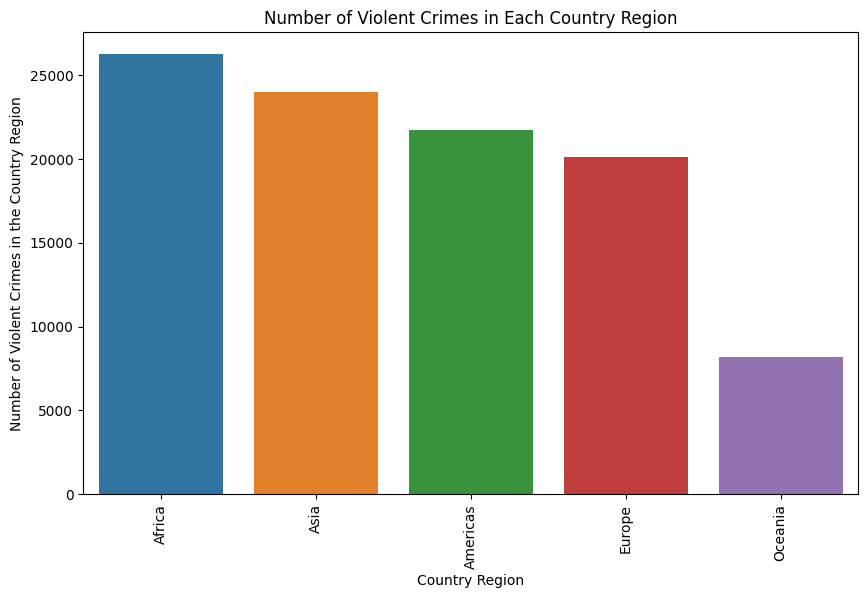

In [8]:
country_counts = GVD_data['country_region'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.xlabel("Country Region")
plt.ylabel("Number of Violent Crimes in the Country Region")
plt.title("Number of Violent Crimes in Each Country Region")
plt.xticks(rotation=90)
plt.show()

In [9]:
country_to_region = {
    'United States of America': 'Americas',
    'Canada': 'Americas',
    'Mexico': 'Americas',
    'Brazil': 'Americas',
    'Argentina': 'Americas',
    'United Kingdom': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Italy': 'Europe',
    'Spain': 'Europe',
    'Russia': 'Europe',
    'India': 'Asia',
    'China': 'Asia',
    'Japan': 'Asia',
    'South Korea': 'Asia',
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',
    'South Africa': 'Africa',
    'Egypt': 'Africa',
    'Nepal': 'Asia',
    'Ireland': 'Europe',
    'Netherlands': 'Europe',
    'Hong Kong': 'Asia',
    'Austria': 'Europe',
    'Poland': 'Europe',
    'West Germany': 'Europe',
    'Portugal': 'Europe',
    'Iran': 'Asia',
    'Greece': 'Europe',
    'Norway': 'Europe',
    'Sweden': 'Europe',
    'Hungary': 'Europe',
    'Switzerland': 'Europe',
    'Luxembourg': 'Europe',
    'Bolivia': 'Americas',
    'Jamaica': 'Americas',
    'Malta': 'Europe',
    'Taiwan': 'Asia',
    'Chile': 'Americas',
    'Peru': 'Americas',
    'Singapore': 'Asia',
    'Denmark': 'Europe',
    'Cuba': 'Americas',
    'Iceland': 'Europe',
    'Kingdom of Great Britain': 'Europe',
    'England': 'Europe',
    'Bulgaria': 'Europe',
    'Croatia': 'Europe',
    'Morocco': 'Africa',
    'Philippines': 'Asia',
    'Lithuania': 'Europe',
    'Mandatory Palestine': 'Asia',
    'Palestinian territories': 'Asia',
    'Kuwait': 'Asia',
    'United Arab Emirates': 'Asia',
    'Serbia and Montenegro': 'Europe',
    'Yugoslavia': 'Europe',
    'Sri Lanka': 'Asia',
    'Pakistan': 'Asia',
    'Ethiopia': 'Africa',
    'Belgium': 'Europe',
    'Finland': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Slovenia': 'Europe',
    'Montenegro': 'Europe',
    'Israel': 'Asia',
    'Zambia': 'Africa',
    'Malaysia': 'Asia',
    'Indonesia': 'Asia',
    'Scotland': 'Europe',
    'Romania': 'Europe',
    'Aruba': 'Americas',
    'Czech Republic': 'Europe',
    'Panama': 'Americas',
    'Puerto Rico': 'Americas',
    'Thailand': 'Asia',
    'Afghanistan': 'Asia',
    'Vietnam': 'Asia',
    'Costa Rica': 'Americas',
    'Uruguay': 'Americas',
    'Burkina Faso': 'Africa',
    'Slovakia': 'Europe',
    'Czechoslovakia': 'Europe',
    'Monaco': 'Europe',
    'Libya': 'Africa',
    'Turkey': 'Asia',
    'West Germany': 'Europe',
    'Somalia': 'Africa',
    'Kenya': 'Africa',
    'Zimbabwe': 'Africa',
    'Isle of Man': 'Europe',
    'Bosnia and Herwegovina': 'Europe',
    'Slovenia': 'Europe',
    'Canada': 'Americas',
    'Montenegro': 'Europe',
    'Serbia': 'Europe',
    'Croatia': 'Europe',
    'Soviet Union': 'Europe',
    'Nigeria': 'Africa',
    'Yugoslavia': 'Europe',
    'Socialist Federal Republic of Yugoslavia': 'Europe',
    'Colombia': 'Americas',
    'Bahamas': 'Americas',
    'Estonia': 'Europe',
    'Finland': 'Europe',
    'Wales': 'Europe',
    'Bangladesh': 'Asia',
    'Slovak Republic': 'Europe',
    'Czech Republic': 'Europe',
    'Weimar Republic': 'Europe',
    'Kuwait': 'Asia',
    'Iraq': 'Asia',
    
    # Add additional countries as necessary
}

def get_region(country_list):
    regions = set()
    countries = country_list.split(', ')
    for country in countries:
        if country in country_to_region:
            regions.add(country_to_region[country])
        else:
            regions.add('Other')
    # Combine multiple regions if necessary
    return ', '.join(regions)

In [10]:
# Apply the function to add a 'Region' column to the DataFrame
Movie_data_clean['Region'] = Movie_data_clean['Countries'].apply(get_region)

# Count the number of movies per region, splitting multiple regions if needed
expanded_region_counts = Movie_data_clean['Region'].str.get_dummies(sep=', ').sum()

/Users/lucie/opt/anaconda3/envs/MLCourse/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucie/opt/anaconda3/envs/MLCourse/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucie/opt/anaconda3/envs/MLCourse/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


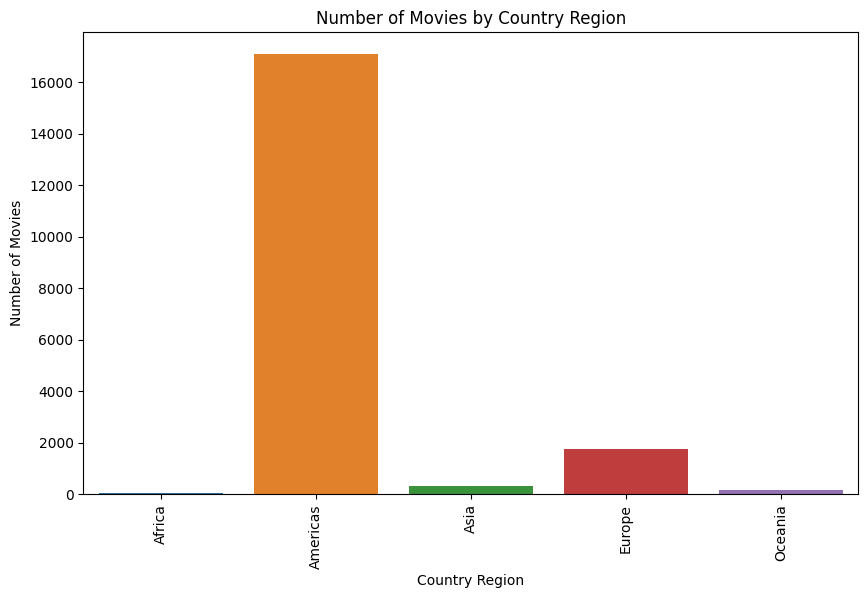

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x=expanded_region_counts.index, y=expanded_region_counts.values)
plt.xlabel("Country Region")
plt.ylabel("Number of Movies")
plt.title("Number of Movies by Country Region")
plt.xticks(rotation=90)
plt.show()

In [12]:
Movie_data_clean

,Wikipedia movie ID,Movie name,Release date,Box office revenue,Languages,Countries,Genres,Plot,Region
0,975900,Ghosts of Mars,2001-08-24,14010832.0,English Language,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...","set in the second half of the 22nd century, th...",Americas
1,6631279,Little city,1997-04-04,NaN,English Language,United States of America,"Romantic comedy, Ensemble Film, Comedy-drama, ...","adam, a san francisco-based artist who works a...",Americas
2,77856,Mary Poppins,1964-08-27,102272727.0,English Language,United States of America,"Children's/Family, Musical, Fantasy, Comedy, D...",the film opens with mary poppins perched in a...,Americas
3,21926710,White on Rice,2009-05-31,NaN,NaN,United States of America,"Romantic comedy, Romance Film, Comedy, Indie",jimmy ([[hiroshi watanabe loves dinosaurs and...,Americas
4,156558,Baby Boy,2001-06-27,29381649.0,English Language,United States of America,"Crime Fiction, Drama, Coming of age",a young 20-year-old named jody lives with his...,Americas
...,...,...,...,...,...,...,...,...,...
17072,25011340,Dot.Kill,2005-03-08,NaN,NaN,United States of America,"Thriller, Crime Thriller, Action, Psychologica...","charlie daines , is a morphine-addicted detect...",Americas
17073,7761830,Spaced Invaders,1990-04-27,15369573.0,English Language,United States of America,"Alien Film, Science Fiction, Family Film, Come...","the space armada from mars, known as the imper...",Americas
17074,1918494,State and Main,2000-08-26,6944471.0,"Italian Language, English Language","France, United States of America","Parody, Americana, Comedy",havoc is wrought on the inhabitants of a small...,"Americas, Europe"
17075,664006,Guilty as Sin,1993-06-04,22886222.0,NaN,United States of America,"Thriller, Erotic thriller, Psychological thril...",jennifer haines is an up-and-coming chicago a...,Americas


In [13]:
import pandas as pd

# Define a list of genres typically associated with violence
violent_genres = ['Horror', 'Thriller', 'Crime Fiction', 'Detective Fiction', 
                  'Crime Thriller', 'Action', 'War', 'Gangster', 'Mystery', 'Adventure']

# Filter movies with violent genres and high box office revenue, handling non-string values
violent_movies = Movie_data_clean[
    (Movie_data_clean['Genres'].apply(lambda x: any(genre in x for genre in violent_genres) if isinstance(x, str) else False)) &
    (Movie_data_clean['Box office revenue'] > 500000.0)  # Set a revenue threshold if needed
]

# Extract the release year for analysis
violent_movies['Release Year'] = pd.to_datetime(violent_movies['Release date']).dt.year

/var/folders/25/2h9htf4x1f38n2lqj0wjyygw0000gn/T/ipykernel_71605/1268307650.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violent_movies['Release Year'] = pd.to_datetime(violent_movies['Release date']).dt.year


In [14]:
# Filter crime data to match movie regions and release years
crime_data_filtered = GVD_data[GVD_data['year'].isin(violent_movies['Release Year']) &
                               GVD_data['country_region'].isin(violent_movies['Region'])]

# Group by year and region and calculate the mean or total crime rate
crime_by_year_region = crime_data_filtered.groupby(['year', 'country_region']).agg({'rate': 'mean'}).reset_index()


In [15]:
# Merge the movie data with aggregated crime data
merged_data = violent_movies.merge(crime_by_year_region, left_on=['Release Year', 'Region'], right_on=['year', 'country_region'], how='left')

# Calculate correlation between box office revenue and crime rate
correlation = merged_data['Box office revenue'].corr(merged_data['rate'])
print(f"Correlation between Box Office Revenue and Crime Rate: {correlation}")


Correlation between Box Office Revenue and Crime Rate: 0.07999325311769112


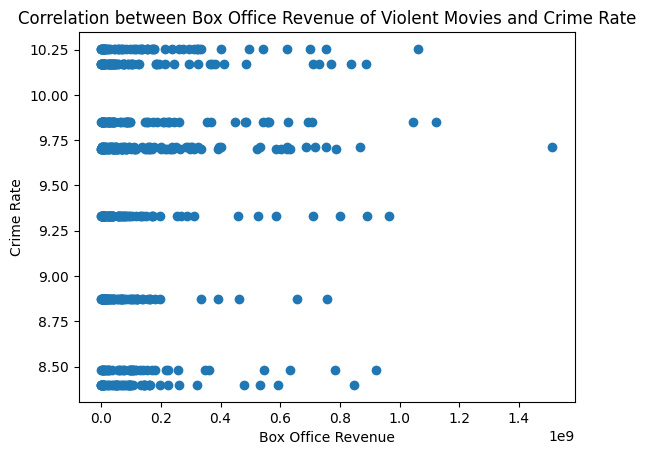

In [16]:
import matplotlib.pyplot as plt

plt.scatter(merged_data['Box office revenue'], merged_data['rate'])
plt.xlabel("Box Office Revenue")
plt.ylabel("Crime Rate")
plt.title("Correlation between Box Office Revenue of Violent Movies and Crime Rate")
plt.show()
